## Do some EDA on the RGB and Depth images, and some text data

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
data_folder = '/dataset/'  # Set root data folder
seq_dir = os.path.join(data_folder, 'sequences')

### Run through all sequences

In [5]:

def get_sequences(seq_dir):
    sequences = [f for f in os.listdir(seq_dir) if len(f) == 2]

    seq = list()
    for f in sequences:
        try:
            int(f)  # Test if numbered
            seq.append(f)
        except ValueError:
            pass
    seq.sort()
    return seq

def get_rgb(seq_dir, sequence, as_int=False):
    rgb_dir = os.path.join(seq_dir, sequence, 'image_raw')  # RGB image
    if as_int == False:
        rgb_files = [f for f in os.listdir(rgb_dir) if f.endswith('.png')]
    else:
        rgb_files = [int(f[:f.find('.png')]) for f in os.listdir(rgb_dir) if f.endswith('.png')]
    rgb_files.sort()
    return rgb_dir, rgb_files

def get_depth(seq_dir, sequence, as_int=False):
    dep_dir = os.path.join(seq_dir, sequence, 'lidar')  # Depth image
    if as_int == False:
        dep_files = [f for f in os.listdir(dep_dir) if f.endswith('.bin')]
    else:
        dep_files = [int(f[:f.find('.bin')]) for f in os.listdir(dep_dir) if f.endswith('.bin')]
    dep_files.sort()
    return dep_dir, dep_files

In [6]:
len_rgb = list()
len_dep = list()

for s in get_sequences(seq_dir):
    print(f'\nSequence {s}:')

    _, rgb_files = get_rgb(seq_dir, s, as_int=True)
    _, dep_files = get_depth(seq_dir, s, as_int=True)

    len_rgb.append(len(rgb_files))
    len_dep.append(len(dep_files))

    print(f'\t{len(rgb_files)} RGB files')
    print(f'\t{len(dep_files)} Depth files')

    if np.all(np.array(rgb_files) == np.array(dep_files)):
        print(f'\tSequence {s} is fine.')
    else:
        print('\tRGB and depth labeling or number of files are not consistent.')
    



Sequence 00:
	229 RGB files
	229 Depth files
	Sequence 00 is fine.

Sequence 01:
	99 RGB files
	1182 Depth files
	RGB and depth labeling or number of files are not consistent.

Sequence 02:
	325 RGB files
	282 Depth files
	RGB and depth labeling or number of files are not consistent.


<ipython-input-6-7e909c7483eb>:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(np.array(rgb_files) == np.array(dep_files)):


In [7]:
len_rgb = list()
len_dep = list()

for s in get_sequences(seq_dir):
    print(f'\nSequence {s}:')

    _, rgb_files = get_rgb(seq_dir, s, as_int=True)
    _, dep_files = get_depth(seq_dir, s, as_int=True)

    len_rgb.append(len(rgb_files))
    len_dep.append(len(dep_files))

    print(f'\t{len(rgb_files)} RGB files')
    print(f'\t{len(dep_files)} Depth files')

    if np.all(np.array(rgb_files) == np.array(dep_files)):
        print(f'\tSequence {s} is fine.')
    else:
        print('\tRGB and depth labeling or number of files are not consistent.')
    


Sequence 00:
	229 RGB files
	229 Depth files
	Sequence 00 is fine.

Sequence 01:
	99 RGB files
	1182 Depth files
	RGB and depth labeling or number of files are not consistent.

Sequence 02:
	325 RGB files
	282 Depth files
	RGB and depth labeling or number of files are not consistent.


<ipython-input-7-7e909c7483eb>:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(np.array(rgb_files) == np.array(dep_files)):


### Check single image and point cloud

#### Read single files

In [9]:
seq = 2 # Choose sequence
fileNumber = 100

In [10]:
rgb_dir, rgb_files = get_rgb(seq_dir, f'{seq:02d}')
dep_dir, dep_files = get_depth(seq_dir, f'{seq:02d}')

rgb_file = os.path.join(rgb_dir, rgb_files[fileNumber])
dep_file = os.path.join(dep_dir, dep_files[fileNumber])

#### Check RGB image

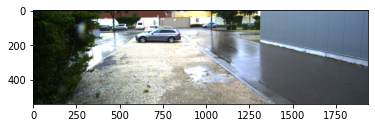

In [11]:
rgb_img = plt.imread(rgb_file)
plt.imshow(rgb_img)

In [12]:
print(f'The raw RGB image shape is {rgb_img.shape}')

The raw RGB image shape is (540, 1936, 3)


#### Check depth image

In [4]:
def load_velo_scan(file):  # From pykitti utils
    """Load and parse a velodyne binary file."""
    scan = np.fromfile(file, dtype=np.float32)
    return scan.reshape((-1, 4))

In [5]:
dep_file = '/home/ancud/HFL_data/dataset/sequences/00/lidar/000025.bin'

In [6]:
dep_img = load_velo_scan(dep_file)

In [7]:
dep_img.shape

(4096, 4)

In [18]:
dep_img

array([[-1.2530425e+00, -3.2489043e-01,  6.7725110e-01,  2.0640000e+03],
       [-1.2574121e+00, -3.0552825e-01,  6.8653804e-01,  2.0640000e+03],
       [-1.2583624e+00, -2.8524837e-01,  6.9348717e-01,  2.1920000e+03],
       ...,
       [ 1.6910776e+00,  3.4403548e-01,  7.8175747e-01,  2.5504000e+04],
       [ 1.6932815e+00,  3.7079450e-01,  7.7419263e-01,  2.3440000e+04],
       [ 1.6918966e+00,  3.9678079e-01,  7.6427490e-01,  2.0864000e+04]],
      dtype=float32)